In [1]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'../src/')

from utils import *
from pipe import *
from pipe_system import PipeSystem
from abstract_pipe import *
from pipe_system.let_index import LetIndex
from copy import deepcopy

from abstract_pipe.let import BoundaryLet
from curve import Cap
from multiply_connected_pipe import MultiplyConnectedPipe

In [2]:
with open('dev_Pipes.pickle','rb') as f:
    pipes, shifts = pickle.load(f)

In [3]:
bdr_pipe = BoundaryPipe([BoundaryLet(-10,0,0,2,1),BoundaryLet(36,0,np.pi,2,-1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]
ps = PipeSystem(real_pipes,bdr_pipe)

In [4]:
mp = MultiplyConnectedPipe(ps)

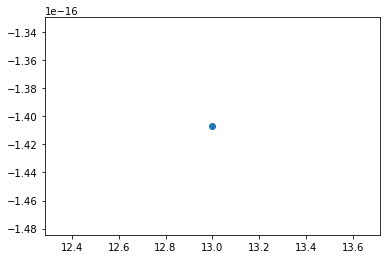

In [11]:
t = mp.t
x = t.real
y = t.imag
z = mp.z
plt.scatter(z.real,z.imag)
boundary_condition = mp.boundary_value(0)


In [17]:
u,v = H2U(boundary_condition).T

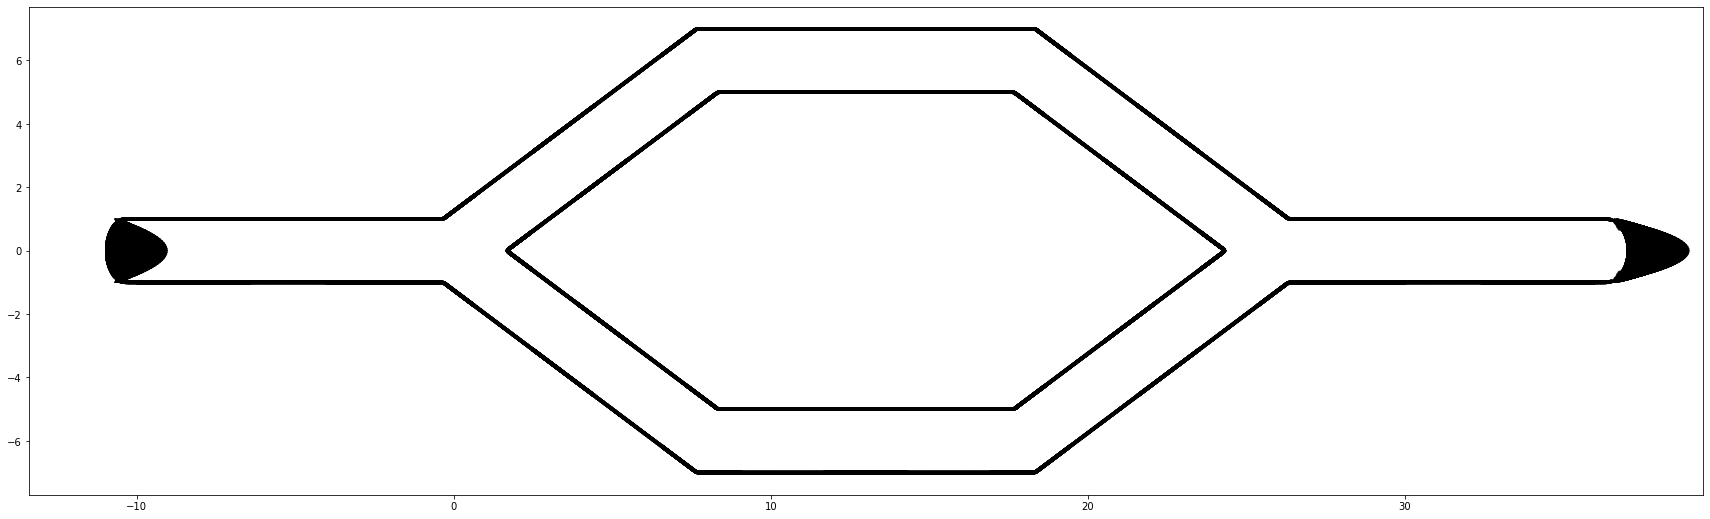

In [29]:
fig, ax = plt.subplots(figsize=(30,10))
ax.set_aspect('equal')
ax.quiver(x,y,u,v,scale=20)